In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv")

In [3]:
df.head()

cgpa  placement_exam_marks  placed
0  7.19                  26.0       1
1  7.46                  38.0       1
2  7.54                  40.0       1
3  6.42                   8.0       1
4  7.23                  17.0       0

In [16]:
df.shape

(1000, 3)

In [4]:
df.describe()

cgpa  placement_exam_marks       placed
count  1000.000000           1000.000000  1000.000000
mean      6.961240             32.225000     0.489000
std       0.615898             19.130822     0.500129
min       4.890000              0.000000     0.000000
25%       6.550000             17.000000     0.000000
50%       6.960000             28.000000     0.000000
75%       7.370000             44.000000     1.000000
max       9.120000            100.000000     1.000000

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

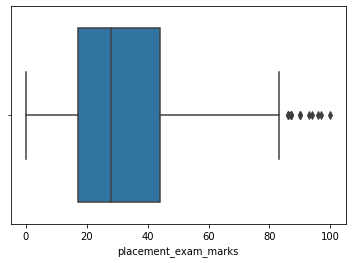

In [5]:
sns.boxplot(df.placement_exam_marks)

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


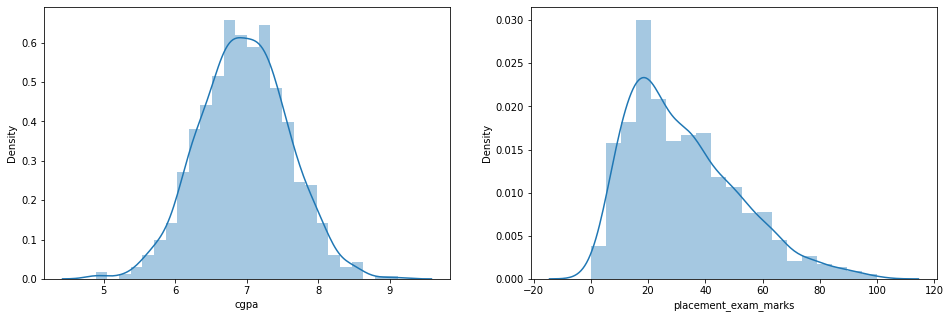

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [7]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [8]:
percentile75

44.0

In [9]:
iqr = percentile75 - percentile25
iqr

27.0

In [10]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [11]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


# Finding the Outliers

In [12]:
df[df['placement_exam_marks'] > upper_limit]

cgpa  placement_exam_marks  placed
9    7.75                  94.0       1
40   6.60                  86.0       1
61   7.51                  86.0       0
134  6.33                  93.0       0
162  7.80                  90.0       0
283  7.09                  87.0       0
290  8.38                  87.0       0
311  6.97                  87.0       1
324  6.64                  90.0       0
630  6.56                  96.0       1
685  6.05                  87.0       1
730  6.14                  90.0       1
771  7.31                  86.0       1
846  6.99                  97.0       0
917  5.95                 100.0       0

In [14]:
df[df['placement_exam_marks'] < lower_limit]

Empty DataFrame
Columns: [cgpa, placement_exam_marks, placed]
Index: []

# Trimming

In [15]:
new_df = df[df['placement_exam_marks'] < upper_limit]
new_df

cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
998  8.62                  46.0       1
999  4.90                  10.0       1

[985 rows x 3 columns]

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level fun

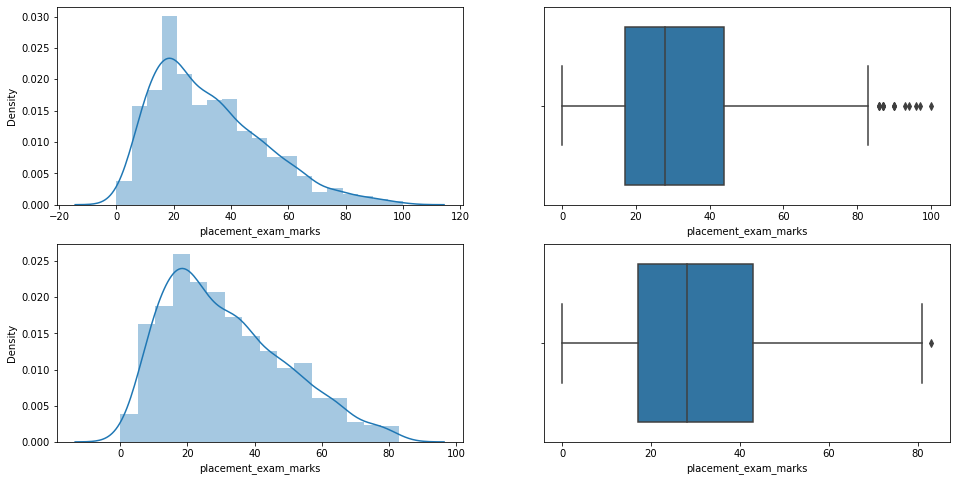

In [17]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()